In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
import hark_portfolio_agents as hpa
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None):
    #initialize population
    pop = hpa.AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    #initialize the financial model
    fm = hpa.FinanceModel() if fm is None else fm
    
    fm.calculate_risky_expectations()
    agent_parameters.update(fm.risky_expectations())
    
    #initialize population model
    pop.init_simulation()
    
    attsim = hpa.AttentionSimulation(pop, fm, a=a, q=q, r=r, market=market)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

In [4]:
#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

Testing the agent population construction.

In [5]:
pop = hpa.AgentPopulation(agent_parameters, dist_params, 20)

In [6]:
isct = IndShockConsumerType(**pop.agents[0].parameters)

In [7]:
isct.solve()

In [8]:
isct.solution[0].mNrmStE

1.4295374863078805

In [9]:
isct

<HARK.ConsumptionSaving.ConsIndShockModel.IndShockConsumerType object at 0x7fb43465cb50.
Parameters:
cycles: 1
CRRA: 4.0
Rfree: 1.0
DiscFac: 0.9465000000000001
LivPrb: [0.9949620563926881]
PermGroFac: [1.0024906793143211]
BoroCnstArt: 0.0
MaxKinks: 400
AgentCount: 4
aNrmInitMean: 0.0
aNrmInitStd: 0.0
pLvlInitMean: 1.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
aXtraMin: 0.001
aXtraMax: 100
aXtraNestFac: 1
aXtraCount: 200
aXtraExtra: [None]
PermShkStd: [0.6191893521335142]
PermShkCount: 7
TranShkStd: [0.16588349452107798]
TranShkCount: 7
UnempPrb: 0.05
UnempPrbRet: 0.005
IncUnemp: 0.3
IncUnempRet: 0.0
tax_rate: 0.0
T_retire: 0
vFuncBool: False
CubicBool: False
neutral_measure: False
RiskyAvg: 1.08
RiskyStd: 0.2
RiskyCount: 5
AdjustPrb: 1.0
ShareCount: 25
DiscreteShareBool: False>

In [10]:
market = hpa.MarketPNL(
   seed_limit = 150
)

config_file: ../PNL/macroliquidity.ini
config_local_file: ../PNL/macroliquidity_local.ini


In [11]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 20, a=0.2, q=3, r=3, market= market)

Q-0
Testing for blob existence: pnl/LMtransactions_SD106BL0SL0.csv
Output for S:106,BL:0,SL:0 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD34BL27SL0.csv
Output for S:34,BL:27,SL:0 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 125
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD125BL58SL0.csv


NL model: /home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/nl/LiquidityModel_MP_PNL_wBuyBroker_and_SellBroker_thin_out.nlogo
NL model loaded
SETTING: SEED:=125
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=58
SETTING: BkrSel_Limit:=0
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL58SL0.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==125.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==58.0
REPORTING: BkrSel_Limit==0.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: De

Elapsed (sys clock), run 125:  46.238061941

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD125BL58SL0.csv
Checking for existence.
Does not exist. Uploading.
Q-1
Testing for blob existence: pnl/LMtransactions_SD112BL121SL0.csv


Sim ID (SEED): 112
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Elapsed (sys clock), run 112:  31.203969045999997

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD112BL121SL0.csv
Checking for existence.
Does not exist. Uploading.
Testing for blob existence: pnl/LMtransactions_SD58BL134SL7.csv
Output for S:58,BL:134,SL:7 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 102
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD102BL147SL6.csv


NL model loaded
SETTING: SEED:=102
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=147
SETTING: BkrSel_Limit:=6
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL147SL6.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==102.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==147.0
REPORTING: BkrSel_Limit==6.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 102:  28.855407264000007

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD102BL147SL6.csv
Checking for existence.
Does not exist. Uploading.
Q-2
Testing for blob existence: pnl/LMtransactions_SD63BL57SL16.csv
Output for S:63,BL:57,SL:16 already exists in Azure Blob storage.
Will use cache.
Testing for blob existence: pnl/LMtransactions_SD42BL246SL0.csv
Output for S:42,BL:246,SL:0 already exists in Azure Blob storage.
Will use cache.


Sim ID (SEED): 115
-------------------------- CONFIG ----------------------------
Current working directory: /home/sb/projects/ufm/HARK_ABM_INTRO_public/HARK
[DEFAULT]
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
loginfo=20
lognotset=0
logwarn=30
parallelcores=18
pythondir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/py
[pnl]
bkrbuy_limit=10
bkrsel_limit=10
csvflushinterval=100
liqbkr_ordersizemultiplier=10
lmallorderpfx=LMallorders_
lmallordersfx=csv
lminventorypfx=LMinventory_
lminventorysfx=csv
lmorderbookpfx=LMorderbook_
lmorderbooksfx=csv
lmtickssimruns=3600
lmtickswarmups=5000
lmtraderctpfx=LMtradercts_
lmtraderctsfx=csv
lmtransactpfx=LMtransactions_
lmtransactsfx=csv
logdebug=10
logdir=/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs
logerror=40
logfatal=50
logfilepfx=LM_
logfilesfx=log
logformat=%(asctime)s::[%(levelname)s]::%(module)s::%(lineno)d — %(message)s
loginfo=20
loglevel=DEBUG
lognotset=0
logwarn=30
nlf

Testing for blob existence: pnl/LMtransactions_SD115BL284SL2.csv


NL model loaded
SETTING: SEED:=115
SETTING: #_LiqSup:=90
SETTING: #_LiqDem:=90
SETTING: #_MktMkr:=5
SETTING: BkrBuy_Limit:=284
SETTING: BkrSel_Limit:=2
SETTING: LiqBkr_OrderSizeMultiplier:=10
SETTING: PeriodtoEndExecution:=3600
NL model -- setup begin
NL model -- setup end
SETTING: endBurninTime:=5000
NL model -- warmups begin: 5000
NL model -- warmups end
Opening transaction log:/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD115BL284SL2.csv
----------------------- LM STATE ------------------------------
REPORTING: SEED==115.0
REPORTING: ticks==5000.0
REPORTING: #_LiqSup==90.0
REPORTING: #_LiqDem==90.0
REPORTING: #_MktMkr==5.0
REPORTING: BkrBuy_Limit==284.0
REPORTING: BkrSel_Limit==2.0
REPORTING: LiqBkr_OrderSizeMultiplier==10.0
REPORTING: PeriodtoEndExecution==3600.0
REPORTING: endBurninTime==5000.0
REPORTING: AgentFile==True
REPORTING: DepthFile==True
REPORTING: FrcSal_QuantSale==2.0
REPORTING: LiqDem_TradeLength==120.0
REPORTING: LiqSup_TradeLength==1020.0

Elapsed (sys clock), run 115:  29.409595419999988

Opening client to upload blob:
	/home/sb/projects/ufm/HARK_ABM_INTRO_public/PNL/out/logs/LMtransactions_SD115BL284SL2.csv
Checking for existence.
Does not exist. Uploading.


In [12]:
data = sim.data()

In [13]:
data

,t,prices,buy,sell,owned,total_assets,mean_income,total_consumption,ror,expected_ror,expected_std
0,0,98.391752,0,0,1231.074200,156685.012227,4086.008467,16825.083707,-0.016082,-0.000001,0.012167
1,1,96.809369,0,0,1231.074200,155007.164470,4096.740622,20975.502681,-0.016082,-0.000607,0.012280
2,2,95.252434,0,0,1231.074200,153224.077374,4101.033484,8364.659515,-0.016082,-0.001189,0.012337
3,3,93.720539,0,0,1231.074200,151338.200663,4101.033484,0.000000,-0.016082,-0.001750,0.012349
4,4,92.213280,0,0,1231.074200,149482.653524,4101.033484,0.000000,-0.016082,-0.002290,0.012322
...,...,...,...,...,...,...,...,...,...,...,...
175,175,49.588205,0,0,2277.711537,177710.216160,4726.338541,0.000000,0.019176,0.012529,0.012096
176,176,50.539125,0,0,2277.711537,180521.422505,4731.000591,8853.796734,0.019176,0.013019,0.011770
177,177,51.508281,0,0,2277.711537,183032.296436,4733.331617,4445.600392,0.019176,0.013473,0.011441
178,178,52.496022,0,0,2277.711537,185282.084504,4733.331617,0.000000,0.019176,0.013893,0.011110


In [28]:
data['total_consumption'].rolling(3).mean()

0               NaN
1               NaN
2      15388.415301
3       9780.054065
4       2788.219838
           ...     
175     2945.231159
176     4423.913897
177     4433.132375
178     4433.132375
179     4454.729181
Name: total_consumption, Length: 180, dtype: float64

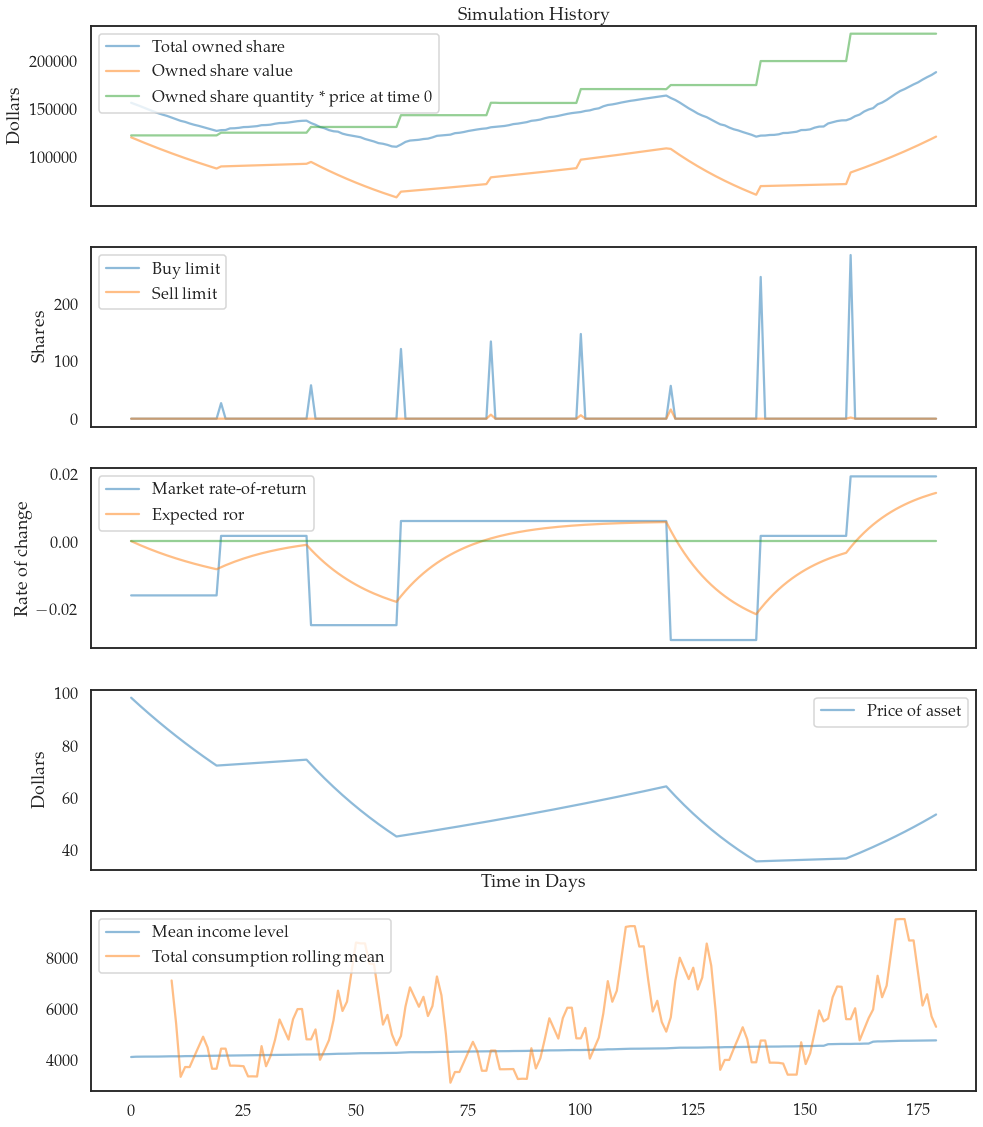

In [30]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(5,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(data['sell'], alpha=0.5, label='Sell limit')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[4].plot(data['mean_income'], alpha=0.5, label='Mean income level')
ax[4].plot(data['total_consumption'].rolling(10).mean(), alpha=0.5, label='Total consumption rolling mean')
ax[4].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [15]:
sim.pop.class_stats()

CRRA DiscFac      aLvl                mNrm           mNrm_ratio_StE  \
                    mean       std      mean       std           mean   
0  4.0  0.9465  1.373128  0.141897  1.308076  0.043458       0.915035   
1  4.0  0.9675  1.422096  0.385434  1.317788  0.057756       0.919081   
2  8.0  0.9465  1.754687  0.079503  1.439977  0.038781       0.930328   
3  8.0  0.9675  1.722925  0.172042  1.411646  0.201932       0.910748   

                                label aLvl_mean  aLvl_std mNrm_mean  mNrm_std  \
        std                                                                     
0  0.030400  CRRA: 4.0, DiscFac: 0.95  1.373128  0.141897  1.308076  0.043458   
1  0.040281  CRRA: 4.0, DiscFac: 0.97  1.422096  0.385434  1.317788  0.057756   
2  0.025055  CRRA: 8.0, DiscFac: 0.95  1.754687  0.079503  1.439977  0.038781   
3  0.130280  CRRA: 8.0, DiscFac: 0.97  1.722925  0.172042  1.411646  0.201932   

  mNrm_ratio_StE_mean mNrm_ratio_StE_std  
                                          
0            0.915035           0.030400  
1            0.919081           0.040281  
2            0.930328           0.025055  
3            0.910748           0.130280

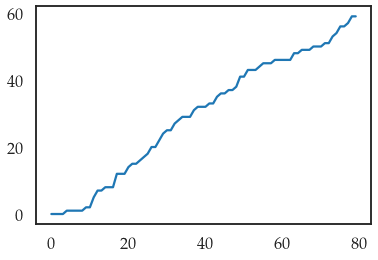

In [16]:
plt.plot(sorted([a.macro_day for a in sim.agents]))

In [17]:
len(sim.history['total_consumption_level'])

180

In [18]:
720000 / 480

1500.0

In [19]:
sim.pop.agents

[<HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7fb4346f6df0.
 Parameters:
 cycles: 1
 CRRA: 4.0
 Rfree: 1.0
 DiscFac: 0.9465000000000001
 LivPrb: [0.9949620563926881]
 PermGroFac: [1.0024906793143211]
 BoroCnstArt: 0.0
 MaxKinks: 400
 AgentCount: 4
 aNrmInitMean: 0.0
 aNrmInitStd: 0.0
 pLvlInitMean: 1.0
 pLvlInitStd: 0.0
 PermGroFacAgg: 1.0
 T_age: None
 T_cycle: 1
 PerfMITShk: False
 aXtraMin: 0.001
 aXtraMax: 100
 aXtraNestFac: 1
 aXtraCount: 200
 aXtraExtra: [None]
 PermShkStd: [0.6191893521335142]
 PermShkCount: 7
 TranShkStd: [0.16588349452107798]
 TranShkCount: 7
 UnempPrb: 0.05
 UnempPrbRet: 0.005
 IncUnemp: 0.3
 IncUnempRet: 0.0
 tax_rate: 0.0
 T_retire: 0
 vFuncBool: False
 CubicBool: False
 neutral_measure: False
 RiskyAvg: 0.9640229875656818
 RiskyStd: 0.06583062416853379
 RiskyCount: 5
 AdjustPrb: 1.0
 ShareCount: 25
 DiscreteShareBool: False>,
 <HARK.ConsumptionSaving.ConsPortfolioModel.PortfolioConsumerType object at 0x7fb4346fcc10.
 Paramet

In [20]:
sim.pop.agents[0].AgentCount

1

In [21]:
sns.lineplot(x=[i for i in range(len(os))], y=os)

NameError: name 'sns' is not defined

In [ ]:
sns.lineplot(x=[i for i in range(len(ta))], y=os)

In [ ]:
sns.lineplot(x=os, y=ta)

In [ ]:
# what are other good plots to include? I don't have the econ background necessary to figure this out yet

In [ ]:
sim.history